# Projet d'économétrie
### MS BGD - 2022
#### Gwladys SANCHEZ et Philéas SAMIR

## Partie 1 - Régression linéaire

### Imports

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import f, t

### Question 1 - Lire le fichier mroz.raw. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [2]:
# On charge les données
df = pd.read_csv("MROZ.raw", delim_whitespace=True, header=None)

# On renomme les colonnes
df.columns = ["inlf","hours","kidslt6","kidsge6","age","educ","wage","repwage",
              "hushrs","husage","huseduc","huswage","faminc","mtr","motheduc",
              "fatheduc","unem","city","exper","nwifeinc","lwage","expersq"]

# On filtre les lignes avec un salaire inférieur ou égal à 0
    # On remplace les données manquantes "." par 0, on transforme les strings en floats
df["wage"] = df["wage"].replace(".",0).astype(float) 
    # On filtre le dataset
df = df[df["wage"]>0] 

# On affiche les 5 premières lignes du dataset
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


### Question 2 - Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieur au 65ème percentile de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur au 65ème percentile de l’échantillon. Commenter.

In [3]:
# On utilise les fonctions fournies par numpy pour calculer les statistiques
print("Pour l'ensemble des femmes :")
print()
print("___* SALAIRE *___")
print("Moyenne :", np.mean(df["wage"]))
print("Écart-type :", np.std(df["wage"]))
print("Min :", np.min(df["wage"]))
print("Max :", np.max(df["wage"]))
print()
print("___* AGE *___")
print("Moyenne :", np.mean(df["age"]))
print("Écart-type :", np.std(df["age"]))
print("Min :", np.min(df["age"]))
print("Max :", np.max(df["age"]))
print()
print("___* EDUCATION *___")
print("Moyenne :", np.mean(df["educ"]))
print("Écart-type :", np.std(df["educ"]))
print("Min :", np.min(df["educ"]))
print("Max :", np.max(df["educ"]))

Pour l'ensemble des femmes :

___* SALAIRE *___
Moyenne : 4.1776815420560744
Écart-type : 3.3064129736891403
Min : 0.1282
Max : 25.0

___* AGE *___
Moyenne : 41.97196261682243
Écart-type : 7.7120587017451605
Min : 30
Max : 60

___* EDUCATION *___
Moyenne : 12.658878504672897
Écart-type : 2.2827043017360173
Min : 5
Max : 17


In [4]:
print("Pour les femmes dont le mari a un salaire supérieur ou égal au 65e pourcentile :")
# On sélectionne les données qui nous intéressent
df_perc = df[df["huswage"]>=np.percentile(df["huswage"], 65)]
print()
print("___* SALAIRE *___")
print("Moyenne :", np.mean(df_perc["wage"]))
print("Écart-type :", np.std(df_perc["wage"]))
print("Min :", np.min(df_perc["wage"]))
print("Max :", np.max(df_perc["wage"]))
print()
print("___* AGE *___")
print("Moyenne :", np.mean(df_perc["age"]))
print("Écart-type :", np.std(df_perc["age"]))
print("Min :", np.min(df_perc["age"]))
print("Max :", np.max(df_perc["age"]))
print()
print("___* EDUCATION *___")
print("Moyenne :", np.mean(df_perc["educ"]))
print("Écart-type :", np.std(df_perc["educ"]))
print("Min :", np.min(df_perc["educ"]))
print("Max :", np.max(df_perc["educ"]))

Pour les femmes dont le mari a un salaire supérieur ou égal au 65e pourcentile :

___* SALAIRE *___
Moyenne : 5.12858552631579
Écart-type : 4.281531833910676
Min : 0.2137
Max : 25.0

___* AGE *___
Moyenne : 42.67763157894737
Écart-type : 7.313111849062443
Min : 30
Max : 59

___* EDUCATION *___
Moyenne : 13.453947368421053
Écart-type : 2.347559807515348
Min : 5
Max : 17


In [5]:
print("Pour les femmes dont le mari a un salaire inférieur au 65e pourcentile :")
# On sélectionne les données qui nous intéressent
df_perc = df[df["huswage"]<np.percentile(df["huswage"], 65)]
print()
print("___* SALAIRE *___")
print("Moyenne :", np.mean(df_perc["wage"]))
print("Écart-type :", np.std(df_perc["wage"]))
print("Min :", np.min(df_perc["wage"]))
print("Max :", np.max(df_perc["wage"]))
print()
print("___* AGE *___")
print("Moyenne :", np.mean(df_perc["age"]))
print("Écart-type :", np.std(df_perc["age"]))
print("Min :", np.min(df_perc["age"]))
print("Max :", np.max(df_perc["age"]))
print()
print("___* EDUCATION *___")
print("Moyenne :", np.mean(df_perc["educ"]))
print("Écart-type :", np.std(df_perc["educ"]))
print("Min :", np.min(df_perc["educ"]))
print("Max :", np.max(df_perc["educ"]))

Pour les femmes dont le mari a un salaire inférieur au 65e pourcentile :

___* SALAIRE *___
Moyenne : 3.6539952898550725
Écart-type : 2.466830145324889
Min : 0.1282
Max : 22.5

___* AGE *___
Moyenne : 41.583333333333336
Écart-type : 7.896312506969913
Min : 30
Max : 60

___* EDUCATION *___
Moyenne : 12.221014492753623
Écart-type : 2.1226164090762643
Min : 6
Max : 17


**Commentaire :**  
On remarque que les femmes dont le mari a un revenu élevé semblent avoir un niveau de salaire et d'éducation plus élevé. La seule façon de confirmer cette observation est d'effectuer un test statistique.

### Question 3 - Faire l'histogramme de la variable wage. Supprimer les observations qui sont à plus de 3 écart-types de la moyenne et refaire l’histogramme.

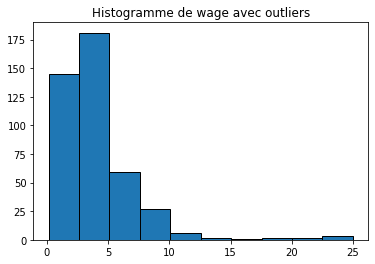

In [6]:
plt.hist(df["wage"], edgecolor="black")
plt.title("Histogramme de wage avec outliers")
plt.show()

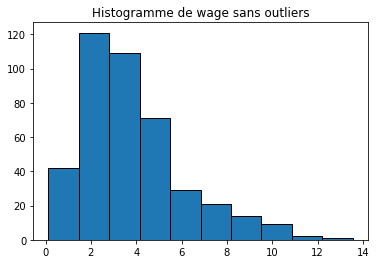

In [7]:
# On crée un dataframe qui exclut les observations à plus de trois écarts-types de la moyenne
df = df[(df["wage"]<df["wage"].mean()+3*df["wage"].std()) & (df["wage"]>df["wage"].mean()-3*df["wage"].std())]
plt.hist(df["wage"], edgecolor="black")
plt.title("Histogramme de wage sans outliers")
plt.show()

### Question 4 - Calculer les corrélations motheduc et fatheduc. Expliquer le problème de multi-collinéarité. Commenter.

In [8]:
# On utilise la fonction de calcul de corrélation de numpy
print("Coefficient de corrélation entre motheduc et fatheduc :", np.corrcoef(df["motheduc"], df["fatheduc"])[0,1])
# On sélectionne la première ligne, deuxième colonne 
# car dans le cas où on n'a que deux variables, la matrice est de taille 2x2, symétrique et la diagonale vaut 1.

Coefficient de corrélation entre motheduc et fatheduc : 0.5487251154655967


**Commentaire :**  
Dans le cas où il y a de fortes dépendances linéaires entre les variables, le calcul de $(X^TX)^{-1}$ ne sera pas possible par la suite, lors de l'entraînement d'un modèle linéaire pour les tests d'hypothèses. On pourra alors choisir de retirer l'une de ces deux variables.

### Question 5 - Faites un graphique en nuage de point entre wage et educ. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

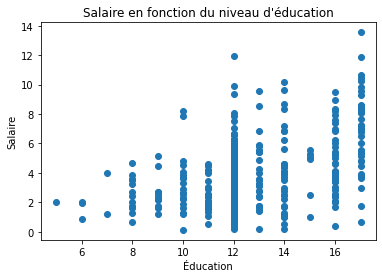

In [9]:
plt.scatter(df["educ"], df["wage"])
plt.xlabel("Éducation")
plt.ylabel("Salaire")
plt.title("Salaire en fonction du niveau d'éducation")
plt.show()

**Commentaire :**  
Il semble y avoir une relation linéaire positive entre le niveau d'éducation et le salaire. Sachant qu'on n'étudie ici que ces deux variables, on fait l'hypothèse *ceteris paribus sic stantibus*, soit toutes choses égales par ailleurs. Cependant, cette hypothèse induit potentiellement un *biais de variable omise*, c'est-à-dire qu'on aurait une ou plusieurs variables non prises en compte qui seraient corrélées aux variables étudiées ici. Par exemple : dans le cas de l'éducation et du salaire, la corrélation pourrait être expliquée par le niveau d'éducation et de salaire des parents.

### Question 6 - Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.

L'hypothèse fondamentale qui garantit des estimateurs non biaisés est l'hypothèse d'indépendance entre les variables, c'est-à-dire que la vraie covariance entre toutes les variables du modèle est nulle.  
Le *biais de variable omise* propose qu'on aurait une ou plusieurs variables non prises en compte qui seraient corrélées aux variables étudiées. Ainsi la corrélation observée pourrait être la conséquence d'une corrélation cachée. Ce biais peut masquer une dépendance entre les variables et mettre à mal l'hypothèse fondamentale.

### Question 7 - Faire la régression du log de wage en utilisant comme variables explicatives une constante, city, educ, exper, nwifeinc, kidslt6, kidsge6. Commentez l'histogramme des résidus.

In [10]:
# On crée notre y
y = np.log(df["wage"])

# On crée notre vecteur constant
s = np.shape(df["wage"])
const = np.ones(s)

# On crée notre X avec les prédicteurs
X = np.column_stack((const, df["city"], df["educ"], df["exper"], df["nwifeinc"], df["kidslt6"], df["kidsge6"]))

# On instantie et on entraîne le modèle, on visualise les résultats
model = sm.OLS(y, X)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.41
Date:                Wed, 11 May 2022   Prob (F-statistic):           6.13e-15
Time:                        15:08:07   Log-Likelihood:                -392.18
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     412   BIC:                             826.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4379      0.195     -2.243      0.025      -0.822      -0.054
x1             0.0236      0.066      0.359      0.720      -0.106       0.153
x2             0.0993      0.014      6.991      0.000       0.071       0.127
x3             0.0189      0.004      4.493      0.000       0.011       0.027
x4             0.0043      0.003      1.376      0.170      -0.002       0.010
x5            -0.0613      0.080     -0.764      0.445      -0.219       0.096
x6            -0.0002      0.025     -0.009      0.993      -0.050       0.049
==============================================================================
Omnibus:                      124.505   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.383
Skew:                          -1.361   Prob(JB):                     1.03e-85
Kurtosis:                       6.874   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

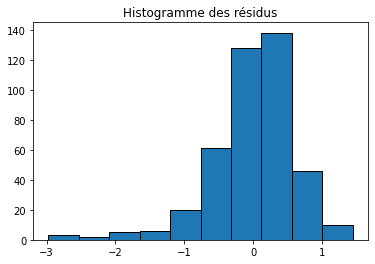

In [11]:
# On imprime l'histogramme des résidus
plt.hist(results.resid, edgecolor="black")
plt.title("Histogramme des résidus")
plt.show()

In [12]:
# On affiche l'espérance des résidus
print(f"Espérance des résidus : {np.mean(results.resid):.2f}")

Espérance des résidus : -0.00


**Commentaire :**  
Nos résidus sont centrés autour de 0, ce qui confirme une des propriétés du modèle linéaire : l'espérance du bruit est nulle.

### Question 8 - Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

In [13]:
# On calcule les betas
beta = np.linalg.inv(X.T @ X)@X.T@y

# On calcule les résidus
u = y - X @ beta.T

# On extrait les dimensions de la matrice des features
n, k = np.shape(X)

# On calcule la variance des résidus
sig2 = u.T @ u / (n-k)
SSR0 = u.T @ u

# On calcule la variance et l'écart-type des coefficients
Var = sig2 * np.linalg.inv(X.T @ X)
std = np.sqrt(np.diag(Var))

# On utilise une loi de Student à n-k-1 degrés de liberté
# On a déjà inclus la constante dans les variables de notre matrice de features X
# Donc on peut tout simplement écrire les degrés de liberté comme X.shape[0]-X.shape[1]
print("Seuils de rejet à droite :")
print("1% :", t.ppf(.995, X.shape[0]-X.shape[1]))
print("5% :", t.ppf(.975, X.shape[0]-X.shape[1]))
print("10% :", t.ppf(.95, X.shape[0]-X.shape[1]))
print()
print("Seuils de rejet à gauche :")
print("1% :", t.ppf(.005, X.shape[0]-X.shape[1]))
print("5% :", t.ppf(.025, X.shape[0]-X.shape[1]))
print("10% :", t.ppf(.05, X.shape[0]-X.shape[1]))
print()
print("Statistique de test t :", results.params[4]/std[4])
print("p-valeur associée :", t.sf(results.params[4]/std[4], X.shape[0]-X.shape[1])*2)

Seuils de rejet à droite :
1% : 2.587814893143625
5% : 1.9657385889937118
10% : 1.6485604765618567

Seuils de rejet à gauche :
1% : -2.5878148931436256
5% : -1.9657385889937122
10% : -1.6485604765618573

Statistique de test t : 1.3759848145287672
p-valeur associée : 0.1695738179343154


La statistique de test est strictement inférieure à tous les seuils de droite et supérieure à tous les seuils de gauche.


La p-valeur montre qu'on ne pourrait rejeter l'hypothèse qu'avec un niveau de confiance de 85%.


Pour les seuils proposés, on ne peut pas rejeter l'hypothèse nulle.

**Commentaire :**  
La statistique de test de x4 soit nwifeinc est inférieure au seuil de rejet à 10%, donc on ne peut pas rejeter $H_0$ pour les trois seuils proposés.

### Question 9 - Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés)

In [14]:
print("Statistique de test t :", (results.params[4]-.01)/std[4])
print("p-valeur associée :", t.sf(np.abs(results.params[4]-.01)/std[4], X.shape[0]-X.shape[1])*2)

Statistique de test t : -1.8162055729215245
p-valeur associée : 0.07006547327900882


**Commentaire :**  
La statistique de test pour $\beta_{nwifeinc}=0.01$ est inférieure au seuil de rejet à 5% (calculé et affiché dans la question 8), donc on ne peut pas rejeter $H_0$.

### Question 10 - Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.

On avait notre modèle :
$$logwage = \beta_0 + \beta_{city}x_1 + \beta_{educ}x_2 + \beta_{exper}x_3 + \beta_{nwifeinc}x_4 + \beta_{kidslt6}x_5 + \beta_{kidsge6}x_6$$

Si :  
$$\theta_1 = 0.01 - \beta_{nwifeinc}$$ 
et 
$$\theta_2 = 0.05 - \beta_{city}$$  
Alors :  
$$\beta_{city} = 0.05 - \theta_2$$
et 
$$\beta_{nwifeinc} = 0.01 - \theta_1$$

Donc :
$$logwage - 0.05x_1 - 0.01x_4 = \beta_0 - \theta_2x_1 + \beta_{educ}x_2 + \beta_{exper}x_3 - \theta_1x_4 + \beta_{kidslt6}x_5 + \beta_{kidsge6}x_6$$

In [15]:
# Modèle contraint pour β_nwifeinc = 0.01, β_city = 0.05
# Avec la réécriture ci-dessus, on suppose que les θ valent 0 :
y10 = y - 0.01*df["nwifeinc"] -0.05*df["city"]
X10 = np.column_stack((const, df["exper"], df["educ"], df["kidslt6"], df["kidsge6"]))

model = sm.OLS(y10, X10)
results = model.fit()
display(results.summary())

u = results.resid

# Calcul des sum of squares residuals
SSR1 = u.T@u
print("\nSSR1 :", SSR1)
print()

# Calcul de la statistique de Fisher pour les θ = 0
n, k = np.shape(X)

# On a deux contraintes
cont = 2

# Calcul de la statistique de test F
F = ((SSR1-SSR0)/cont)/(SSR0/(n-k))
print("F :", F)
print("p-val :", f.sf(F, cont, n-k))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     18.41
Date:                Wed, 11 May 2022   Prob (F-statistic):           6.16e-14
Time:                        15:08:08   Log-Likelihood:                -394.19
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     414   BIC:                             818.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4785      0.194     -2.464      0.014      -0.860      -0.097
x1             0.0203      0.004      4.878      0.000       0.012       0.028
x2             0.0910      0.014      6.687      0.000       0.064       0.118
x3            -0.0463      0.080     -0.579      0.563      -0.204       0.111
x4             0.0007      0.025      0.028      0.978      -0.049       0.050
==============================================================================
Omnibus:                      119.077   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.623
Skew:                          -1.323   Prob(JB):                     2.68e-77
Kurtosis:                       6.633   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


SSR1 : 161.02777129880783

F : 1.9832124372278208
p-val : 0.1389380910856505


**Commentaire :**
On ne peut pas rejeter l'hypothèse nulle pour un seuil de 5% (il nous faudrait un seuil de 14% pour rejeter l'hypothèse nulle), c'est-à-dire que l'hypothèse jointe que les coefficients de ces variables valent respectivement 0.01 pour nwifeinc et 0.05 pour city ne peut pas être invalidée.

### Question 11 - Tester l'hypothèse jointe que $\beta_{nwifeinc} + \beta_{city} = 0.1$ et $\beta_{educ} + \beta_{exper} = 0.1$

On avait notre modèle :
$$logwage = \beta_0 + \beta_{city}x_1 + \beta_{educ}x_2 + \beta_{exper}x_3 + \beta_{nwifeinc}x_4 + \beta_{kidslt6}x_5 + \beta_{kidsge6}x_6$$

Si :  
$$\theta_1 = 0.1 - \beta_{nwifeinc} - \beta_{city}$$ 
et 
$$\theta_2 = 0.1 - \beta_{educ} - \beta_{exper}$$  
Alors :  
$$\beta_{educ} = 0.1 - \beta_{exper} - \theta_2$$
et 
$$\beta_{nwifeinc} = 0.1 - \beta_{city} - \theta_1$$

Donc :
$$logwage = \beta_0 + \beta_{city}x_1 + (0.1 - \theta_2 - \beta_{exper})x_2 + \beta_{exper}x_3 + (0.1 - \theta_1 - \beta_{city})x_4 + \beta_{kidslt6}x_5 + \beta_{kidsge6}x_6$$
$$logwage - 0.1(x_4 + x_2) = \beta_0 + \beta_{city}(x_1-x_4) - \theta_2x_2 + \beta_{exper}(x_3-x_2) - \theta_1x_4 + \beta_{kidslt6}x_5 + \beta_{kidsge6}x_6$$

In [16]:
# Modèle contraint pour β_nwifeinc + β_city = 0.1, β_educ + β_exper = 0.1
# Avec la réécriture ci-dessus, on suppose que les θ valent 0 :
y11 = y - 0.1*(df["nwifeinc"] + df["educ"])
X11 = np.column_stack((const, df["city"]-df["nwifeinc"], df["exper"]-df["educ"], df["kidslt6"], df["kidsge6"]))

model = sm.OLS(y11,X11)
results = model.fit()
display(results.summary())
print()
u = results.resid

# Calcul des sum of squares residuals
SSR1 = u.T@u
print("SSR1 :", SSR1)
print()

# Calcul de la statistique de Fisher pour les θ = 0
n, k = np.shape(X)

# On a deux contraintes
cont = 2

# Calcul de la statistique de test F
F = ((SSR1-SSR0)/cont)/(SSR0/(n-k))
print("F :", F)
print("p-val :", f.sf(F, cont, n-k))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     293.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.03e-119
Time:                        15:08:08   Log-Likelihood:                -393.46
No. Observations:                 419   AIC:                             796.9
Df Residuals:                     414   BIC:                             817.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2531      0.074     -3.404      0.001      -0.399      -0.107
x1             0.0955      0.003     31.711      0.000       0.090       0.101
x2             0.0175      0.004      4.323      0.000       0.010       0.025
x3            -0.0530      0.080     -0.664      0.507      -0.210       0.104
x4            -0.0037      0.025     -0.151      0.880      -0.052       0.045
==============================================================================
Omnibus:                      122.738   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.424
Skew:                          -1.353   Prob(JB):                     4.95e-82
Kurtosis:                       6.758   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


SSR1 : 160.46518224103016

F : 1.2565733079964547
p-val : 0.28571617531985405


**Commentaire :**
On ne peut pas rejeter l'hypothèse nulle pour un seuil de 5% (il nous faudrait un seuil de 29% pour rejeter l'hypothèse nulle), c'est-à-dire que l'hypothèse jointe que les coefficients de ces variables somment à 0.1 ne peut pas être invalidée.

### Question 12 - Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commentez.

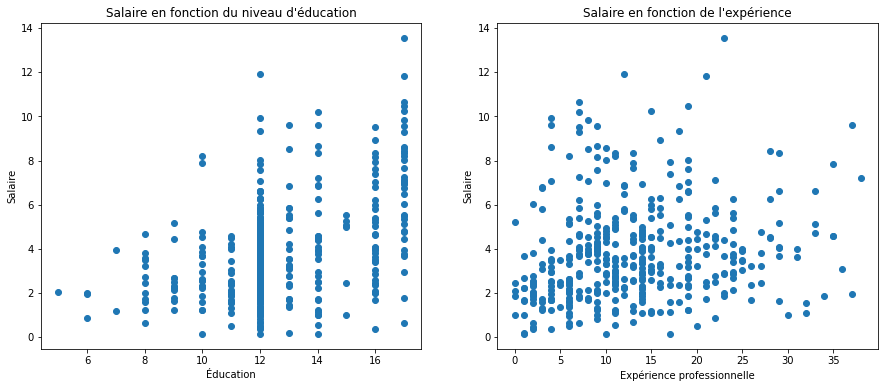

In [17]:
fig = plt.figure(figsize=(15,6))

# Tracé du salaire en fonction de l'éducation
ax = fig.add_subplot(1,2,1)
ax.scatter(df["educ"], df["wage"])
ax.set_xlabel("Éducation")
ax.set_ylabel("Salaire")
ax.set_title("Salaire en fonction du niveau d'éducation")

# Tracé du salaire en fonction de l'expérience
ax = fig.add_subplot(1,2,2)
ax.scatter(df["exper"], df["wage"])
ax.set_xlabel("Expérience professionnelle")
ax.set_ylabel("Salaire")
ax.set_title("Salaire en fonction de l'expérience")
plt.show()

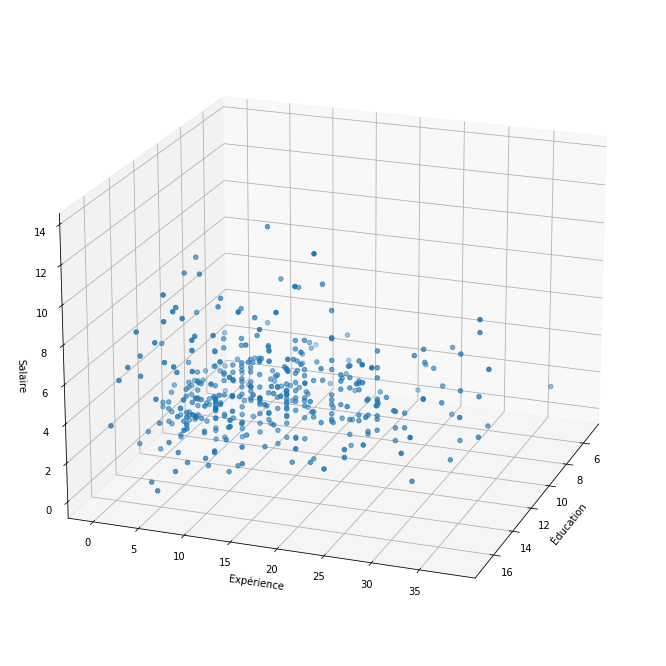

In [18]:
# Visualisation 3D du salaire en fonction de l'éducation et de l'expérience

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df["educ"], df["exper"], df["wage"])
ax.set_xlabel("Éducation")
ax.set_ylabel("Expérience")
ax.set_zlabel("Salaire")
ax.view_init(20,20)
plt.show()

**Commentaire :**  
On voit ce qui semble être une relation positive entre l'expérience et le salaire, ainsi qu'entre l'éducation et le salaire, cependant il existe des outliers (des observations pour lesquelles le salaire est élevé malgré une faible valeur d'expérience/éducation, en particulier pour l'expérience) qui rendent difficile l'interprétation visuelle.

### Question 13 - Tester l’égalité des coefficients associés aux variables kidsge6 et kidslt6. Interprétez.

On avait notre modèle :
$$logwage = \beta_0 + \beta_{city}x_1 + \beta_{educ}x_2 + \beta_{exper}x_3 + \beta_{nwifeinc}x_4 + \beta_{kidslt6}x_5 + \beta_{kidsge6}x_6$$

Si :  
$$\theta = \beta_{kidslt6} - \beta_{kidsge6}$$ 
Alors :  
$$\beta_{kidslt6} = \beta_{kidsge6} - \theta$$

Donc :
$$logwage = \beta_0 + \beta_{city}x_1 + \beta_{educ}x_2 + \beta_{exper}x_3 + \beta_{nwifeinc}x_4 + (\beta_{kidsge6} - \theta)x_5 + \beta_{kidsge6}x_6$$
$$logwage = \beta_0 + \beta_{city}x_1 + \beta_{educ}x_2 + \beta_{exper}x_3 + \beta_{nwifeinc}x_4 + \beta_{kidsge6}(x_5 + x_6) - \theta x_6$$

In [19]:
# Modèle contraint pour β_kidslt6 = β_kidsge6
# Avec la réécriture ci-dessus, on suppose que θ = 0 :
y13 = y 
X13 = np.column_stack((const, df["city"], df["nwifeinc"], df["exper"], df["educ"], df["kidslt6"] + df["kidsge6"]))

model = sm.OLS(y13,X13)
results = model.fit()
display(results.summary())
print()
u = results.resid

# Calcul des sum of squares residuals
SSR1 = u.T@u
print("SSR1 :", SSR1)
print()

# Calcul de la statistique de Fisher pour θ = 0
n, k = np.shape(X)

# On a une seule contrainte
cont = 1

# Calcul de la statistique de test F
F = ((SSR1-SSR0)/cont)/(SSR0/(n-k))
print("F :", F)
print("p-val :", f.sf(F, cont, n-k))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     17.21
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.78e-15
Time:                        15:08:08   Log-Likelihood:                -392.45
No. Observations:                 419   AIC:                             796.9
Df Residuals:                     413   BIC:                             821.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4209      0.194     -2.173      0.030      -0.802      -0.040
x1             0.0220      0.066      0.335      0.738      -0.107       0.151
x2             0.0045      0.003      1.453      0.147      -0.002       0.011
x3             0.0191      0.004      4.537      0.000       0.011       0.027
x4             0.0976      0.014      6.973      0.000       0.070       0.125
x5            -0.0061      0.024     -0.257      0.797      -0.053       0.041
==============================================================================
Omnibus:                      124.653   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.035
Skew:                          -1.364   Prob(JB):                     1.22e-85
Kurtosis:                       6.868   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


SSR1 : 159.693225715759

F : 0.5190309837291402
p-val : 0.4716638705520644


**Commentaire :**
On ne peut pas rejeter l'hypothèse nulle pour un seuil de 5% (il nous faudrait un seuil de 48% pour rejeter l'hypothèse nulle), c'est-à-dire que l'hypothèse que les coefficients de ces variables sont égaux ne peut être invalidée.

### Question 14 - Faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

On commence par faire la régression linéaire du carré des résidus :

In [20]:
model = sm.OLS(y, X)
results = model.fit()
u = results.resid
model = sm.OLS(u**2, X)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.413
Date:                Wed, 11 May 2022   Prob (F-statistic):              0.208
Time:                        15:08:08   Log-Likelihood:                -556.50
No. Observations:                 419   AIC:                             1127.
Df Residuals:                     412   BIC:                             1155.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2711      0.289      0.938      0.349      -0.297       0.839
x1             0.0679      0.097      0.697      0.486      -0.123       0.259
x2             0.0158      0.021      0.751      0.453      -0.026       0.057
x3            -0.0098      0.006     -1.569      0.117      -0.022       0.002
x4            -0.0041      0.005     -0.880      0.379      -0.013       0.005
x5             0.0949      0.119      0.799      0.424      -0.138       0.328
x6             0.0433      0.037      1.159      0.247      -0.030       0.117
==============================================================================
Omnibus:                      515.107   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35331.114
Skew:                           5.931   Prob(JB):                         0.00
Kurtosis:                      46.394   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Commentaire :**
On a F = 1.413 et la p-valeur associée 0.208.  
On ne peut pas rejeter $H_0$ avec un seuil de 5%.  
Ici, on constate que l'hypothèse $\beta_{exper} = 0$ est rejetée avec un seuil de confiance inférieur à 12%. On suppose que cette variable est responsable de l'hétéroscédasticité.  
D'après le cours, on peut corriger l'hétéroscédasticité en travaillant sur les variables pour lesquelles le coefficient est corrélé avec un fort niveau de confiance aux résidus. 

On procède alors à une régression pondérée par les valeurs de cette variable, puis on refait la régression des résidus au carré.  
NB : Certaines valeurs de exper sont nulles. Afin de conserver toutes nos données, mais d'éviter de diviser par 0, on ajoute 1 à toutes les valeurs dans les poids. On aurait pu ajouter un epsilon proche de 0, mais cette approche aurait donné un poids énorme aux données d'expérience nulle, ajouter 1 nous semblait donc moins biaisé.

In [21]:
# Régression pondérée
model = sm.WLS(y, X, weights=1/(df["exper"]+1))
results = model.fit()
display(results.summary())

# Régression du carré des résidus
u = results.resid
model = sm.OLS(u**2, X)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.194
Model:                            WLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     16.56
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.01e-17
Time:                        15:08:08   Log-Likelihood:                -505.73
No. Observations:                 419   AIC:                             1025.
Df Residuals:                     412   BIC:                             1054.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5842      0.215     -2.715      0.007      -1.007      -0.161
x1            -0.1439      0.074     -1.944      0.053      -0.289       0.002
x2             0.1039      0.017      6.082      0.000       0.070       0.138
x3             0.0329      0.005      6.118      0.000       0.022       0.043
x4             0.0047      0.003      1.515      0.130      -0.001       0.011
x5            -0.1683      0.082     -2.054      0.041      -0.329      -0.007
x6             0.0129      0.028      0.463      0.643      -0.042       0.068
==============================================================================
Omnibus:                      239.436   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3166.989
Skew:                          -2.153   Prob(JB):                         0.00
Kurtosis:                      15.762   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.039
Date:                Wed, 11 May 2022   Prob (F-statistic):              0.399
Time:                        15:08:08   Log-Likelihood:                -554.87
No. Observations:                 419   AIC:                             1124.
Df Residuals:                     412   BIC:                             1152.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2285      0.288      0.794      0.428      -0.337       0.794
x1             0.0407      0.097      0.420      0.675      -0.150       0.231
x2             0.0150      0.021      0.719      0.473      -0.026       0.056
x3            -0.0041      0.006     -0.665      0.507      -0.016       0.008
x4            -0.0041      0.005     -0.892      0.373      -0.013       0.005
x5             0.1146      0.118      0.969      0.333      -0.118       0.347
x6             0.0535      0.037      1.438      0.151      -0.020       0.127
==============================================================================
Omnibus:                      518.298   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40542.462
Skew:                           5.927   Prob(JB):                         0.00
Kurtosis:                      49.709   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Commentaire :**  
On passe d'une p-valeur (pour notre statistique de test F) de 0.208 à une p-valeur de 0.399. On a donc corrigé l'hétéroscédasticité grâce à la méthode de pondération (Weighted Least Squares).

On regarde maintenant les écarts-types des coefficients obtenus :

In [22]:
model = sm.OLS(y, X)
results = model.fit()
print("Coefficients du modèle de la question 7 :")
print(results.bse)
print()
model = sm.WLS(y, X, weights=1/(df["exper"]+1))
results = model.fit()
print("Coefficients du modèle corrigeant l'hétéroscédasticité :")
print(results.bse)

Coefficients du modèle de la question 7 :
const    0.195239
x1       0.065747
x2       0.014201
x3       0.004208
x4       0.003133
x5       0.080164
x6       0.025232
dtype: float64

Coefficients du modèle corrigeant l'hétéroscédasticité :
const    0.215167
x1       0.074005
x2       0.017089
x3       0.005381
x4       0.003096
x5       0.081946
x6       0.027935
dtype: float64


**Commentaire :**  
On augmente légèrement les écarts-types de nos coefficients en corrigeant l'hétéroscédasticité par la pondération.

### Question 15 - Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Donnez les p-valeurs.

On calcule les différents indicateurs statistiques pour le cas des femmes âgées de moins de 43 ans :

In [23]:
dflt43 = df[df["age"]<43]
Xlt43 = np.column_stack((np.ones(len(dflt43)), dflt43["city"], dflt43["educ"], dflt43["exper"], dflt43["nwifeinc"], dflt43["kidslt6"], dflt43["kidsge6"]))
ylt43 = y[df["age"]<43]

# On calcule les betas
beta = np.linalg.inv(Xlt43.T @ Xlt43)@Xlt43.T@ylt43

# On calcule les résidus
u = ylt43 - Xlt43 @ beta.T

# On extrait les dimensions de la matrice des features
n, k = np.shape(Xlt43)

# On calcule la variance des résidus
sig2 = u.T @ u / (n-k)
SSR0 = u.T @ u

# On calcule la variance et l'écart-type des coefficients
Var = sig2 * np.linalg.inv(Xlt43.T @ Xlt43)
std = np.sqrt(np.diag(Var))

# On utilise une loi de Student à n-k-1 degrés de liberté
# On a déjà inclus la constante dans les variables de notre matrice de features Xlt43
# Donc on peut tout simplement écrire les degrés de liberté comme Xlt43.shape[0]-Xlt43.shape[1]
print("Statistique de test t :", results.params[4]/std[4])
print("p-valeur associée :", t.sf(results.params[4]/std[4], Xlt43.shape[0]-Xlt43.shape[1])*2)
print()
print("La p-valeur montre qu'on ne pourrait rejeter l'hypothèse qu'avec un niveau de confiance de 57%.")
print("Pour le seuil de 5%, on ne peut pas rejeter l'hypothèse nulle.")

Statistique de test t : 0.9929703589010751
p-valeur associée : 0.3219007258344175

La p-valeur montre qu'on ne pourrait rejeter l'hypothèse qu'avec un niveau de confiance de 57%.
Pour le seuil de 5%, on ne peut pas rejeter l'hypothèse nulle.


On calcule maintenant les différents indicateurs statistiques pour le cas des femmes âgées de 43 ans et plus :

In [24]:
dfge43 = df[df["age"]>=43]
Xge43 = np.column_stack((np.ones(len(dfge43)), dfge43["city"], dfge43["educ"], dfge43["exper"], dfge43["nwifeinc"], dfge43["kidslt6"], dfge43["kidsge6"]))
yge43 = y[df["age"]>=43]

# On calcule les betas
beta = np.linalg.inv(Xge43.T @ Xge43)@Xge43.T@yge43

# On calcule les résidus
u = yge43 - Xge43 @ beta.T

# On extrait les dimensions de la matrice des features
n, k = np.shape(Xge43)

# On calcule la variance des résidus
sig2 = u.T @ u / (n-k)
SSR0 = u.T @ u

# On calcule la variance et l'écart-type des coefficients
Var = sig2 * np.linalg.inv(Xge43.T @ Xge43)
std = np.sqrt(np.diag(Var))

# On utilise une loi de Student à n-k-1 degrés de liberté
# On a déjà inclus la constante dans les variables de notre matrice de features Xge43
# Donc on peut tout simplement écrire les degrés de liberté comme Xge43.shape[0]-Xge43.shape[1]
print("Statistique de test t :", results.params[4]/std[4])
print("p-valeur associée :", t.sf(results.params[4]/std[4], Xge43.shape[0]-Xge43.shape[1])*2)
print()
print("La p-valeur montre qu'on ne pourrait rejeter l'hypothèse qu'avec un niveau de confiance de 72%.")
print("Pour le seuil de 5%, on ne peut pas rejeter l'hypothèse nulle.")

Statistique de test t : 1.093576438892071
p-valeur associée : 0.275449638464324

La p-valeur montre qu'on ne pourrait rejeter l'hypothèse qu'avec un niveau de confiance de 72%.
Pour le seuil de 5%, on ne peut pas rejeter l'hypothèse nulle.


### Question 16 - Ajouter au modèle de la question 7 la variable huseduc. Faire ensuite la même régression en décomposant la variable huseduc en 4 variables binaires construites selon votre choix. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et commentez.

In [25]:
# On crée notre y
y = np.log(df["wage"])

# On crée notre vecteur constant
s = np.shape(df["wage"])
const = np.ones(s)

# On crée notre X avec les prédicteurs
X = np.column_stack((const, df["city"], df["educ"], df["exper"], df["nwifeinc"], df["kidslt6"], df["kidsge6"], df["huseduc"]))

# On instantie et on entraîne le modèle, on visualise les résultats
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     12.50
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.53e-14
Time:                        15:08:08   Log-Likelihood:                -391.67
No. Observations:                 419   AIC:                             799.3
Df Residuals:                     411   BIC:                             831.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4025      0.198     -2.029      0.043      -0.793      -0.012
x1             0.0326      0.066      0.491      0.624      -0.098       0.163
x2             0.1082      0.017      6.451      0.000       0.075       0.141
x3             0.0187      0.004      4.429      0.000       0.010       0.027
x4             0.0049      0.003      1.548      0.123      -0.001       0.011
x5            -0.0582      0.080     -0.725      0.469      -0.216       0.100
x6            -0.0002      0.025     -0.009      0.993      -0.050       0.049
x7            -0.0130      0.013     -1.001      0.317      -0.038       0.012
==============================================================================
Omnibus:                      125.212   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              399.472
Skew:                          -1.363   Prob(JB):                     1.80e-87
Kurtosis:                       6.931   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On choisit de décomposer la variable huseduc en rangeant les valeurs dans 4 tranches de taille égale, c'est-à-dire en découpant sur les quantiles.

In [26]:
# On remplace les valeurs continues par l'information sur la tranche
df["huseduc_disc"] = pd.qcut(df["huseduc"], 4)

# On encode cette variable en "one-hot-vector", avec une colonne par tranche
df = pd.get_dummies(df, columns=["huseduc_disc"])
df

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,unem,city,exper,nwifeinc,lwage,expersq,"huseduc_disc_(3.999, 11.0]","huseduc_disc_(11.0, 12.0]","huseduc_disc_(12.0, 16.0]","huseduc_disc_(16.0, 17.0]"
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,5.0,0,14,10.910060,1.210154,196,0,1,0,0
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,11.0,1,5,19.499980,.3285121,25,1,0,0,0
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,5.0,0,15,12.039910,1.514138,225,0,1,0,0
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,5.0,0,6,6.799996,.0921233,36,1,0,0,0
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,9.5,1,7,20.100060,1.524272,49,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,680,0,5,36,10,2.3118,0.00,3430,43,...,7.5,0,2,18.199980,.8380265,4,0,1,0,0
424,1,2450,0,1,40,12,5.3061,6.50,2008,40,...,5.0,1,21,22.641060,1.668857,441,1,0,0,0
425,1,2144,0,2,43,13,5.8675,0.00,2140,43,...,7.5,1,22,21.640080,1.769429,484,1,0,0,0
426,1,1760,0,1,33,12,3.4091,3.21,3380,34,...,11.0,1,14,23.999980,1.226448,196,0,1,0,0


In [27]:
# on renomme les colonnes ainsi créées pour simplifier les en-têtes
df.columns = df.columns[:-4].to_list()+['bin1', 'bin2', 'bin3', 'bin4']

In [28]:
# On crée notre X avec les prédicteurs, on exclut la quatrième variable binaire qui dépend linéairement des autres
X = np.column_stack((const, df["city"], df["educ"], df["exper"], df["nwifeinc"], df["kidslt6"], df["kidsge6"], df["bin1"], df["bin2"], df["bin3"]))

# On instantie et on entraîne le modèle, on visualise les résultats
model = sm.OLS(y, X)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     10.07
Date:                Wed, 11 May 2022   Prob (F-statistic):           5.01e-14
Time:                        15:08:08   Log-Likelihood:                -390.16
No. Observations:                 419   AIC:                             800.3
Df Residuals:                     409   BIC:                             840.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7201      0.279     -2.582      0.010      -1.268      -0.172
x1             0.0346      0.066      0.523      0.601      -0.095       0.164
x2             0.1105      0.017      6.648      0.000       0.078       0.143
x3             0.0194      0.004      4.594      0.000       0.011       0.028
x4             0.0057      0.003      1.766      0.078      -0.001       0.012
x5            -0.0476      0.080     -0.591      0.555      -0.206       0.110
x6             0.0020      0.025      0.081      0.935      -0.048       0.052
x7             0.1105      0.120      0.918      0.359      -0.126       0.347
x8             0.1819      0.110      1.651      0.100      -0.035       0.399
x9             0.0289      0.102      0.283      0.777      -0.172       0.229
==============================================================================
Omnibus:                      127.802   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.853
Skew:                          -1.381   Prob(JB):                     6.76e-92
Kurtosis:                       7.052   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On teste désormais que l'ensemble des coefficients des variables binaires sont nuls en même temps, sous la forme d'une hypothèse jointe :
$$\beta_{bin1} = \beta_{bin2} = \beta_{bin3} = 0$$

In [29]:
# On calcule la sum of squares residuals pour le modèle non contraint
SSR0 = results.resid.T@results.resid

# Modèle contraint pour β_bin1 = β_bin2 = β_bin3 = 0
# On suppose que les β considérés valent 0 :
y16 = y 
X16 = np.column_stack((const, df["city"], df["nwifeinc"], df["exper"], df["educ"], df["kidslt6"], df["kidsge6"]))

model = sm.OLS(y16,X16)
results = model.fit()
display(results.summary())
print()
u = results.resid

# Calcul des sum of squares residuals
SSR1 = u.T@u
print("SSR1 :", SSR1)
print()

# Calcul de la statistique de Fisher pour les β considérés à 0
n, k = np.shape(X)

# On a une seule contrainte
cont = 3

# Calcul de la statistique de test F
F = ((SSR1-SSR0)/cont)/(SSR0/(n-k))
print("F :", F)
print("p-val :", f.sf(F, cont, n-k))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.41
Date:                Wed, 11 May 2022   Prob (F-statistic):           6.13e-15
Time:                        15:08:08   Log-Likelihood:                -392.18
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     412   BIC:                             826.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4379      0.195     -2.243      0.025      -0.822      -0.054
x1             0.0236      0.066      0.359      0.720      -0.106       0.153
x2             0.0043      0.003      1.376      0.170      -0.002       0.010
x3             0.0189      0.004      4.493      0.000       0.011       0.027
x4             0.0993      0.014      6.991      0.000       0.071       0.127
x5            -0.0613      0.080     -0.764      0.445      -0.219       0.096
x6            -0.0002      0.025     -0.009      0.993      -0.050       0.049
==============================================================================
Omnibus:                      124.505   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.383
Skew:                          -1.361   Prob(JB):                     1.03e-85
Kurtosis:                       6.874   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


SSR1 : 159.49229987764568

F : 1.323040243067618
p-val : 0.26638586762724287


**Commentaire :**  
Pris individuellement, on ne peut pas rejeter l'hypothèse que les coefficients sont nuls pour un seuil de 5% (p-valeurs : 0.359, 0.100, 0.777).  
Pour l'hypothèse jointe, on a une p-valeur de 0.266. On ne peut donc toujours pas rejeter l'hypothèse nulle pour un seuil de 5%. 

## Partie 2 - Séries temporelles

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.ar_model import AutoReg as AR

from scipy.stats import t, f

import warnings
warnings.filterwarnings("ignore")

### Question 1 - Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes)

In [31]:
df = pd.read_excel("quarterly.xls")
df

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011Q4,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496
208,2012Q1,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187


On vérifie qu'il n'y a pas de valeur manquante dans le jeu de données, en recherchant les "NaN", une fois le dataframe converti en "float". Cette approche permet de s'assurer qu'il n'y a pas de string vide par exemple.

In [32]:
# On modifie la date pour pouvoir convertir en float
df.DATE = df.DATE.str.replace("Q",".")
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960.1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960.2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960.3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960.4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961.1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [33]:
df.astype(float).isna().sum()

DATE        0
FFR         0
Tbill       0
Tb1yr       0
r5          0
r10         0
PPINSA      0
Finished    0
CPI         0
CPICORE     0
M1NSA       0
M2SA        0
M2NSA       0
Unemp       0
IndProd     0
RGDP        0
Potent      0
Deflator    0
Curr        0
dtype: int64

Il n'y a donc pas de valeurs manquantes.

### Question 2 - Stationnariser la série de CPI en utilisant la méthode de régression qui inclut un terme de tendance dont la forme fonctionnelle est à choisir (linéaire, quadratique, log, exponentielle, …)

On regarde l'allure générale de la série de CPI :

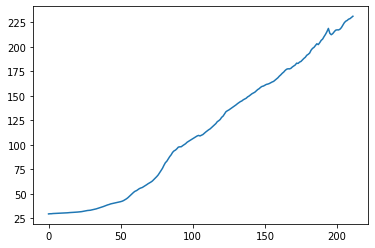

In [34]:
df.CPI.plot();

On constate que la courbe a une dépendance dans le temps, qui semble linéaire au delà d'un certain indice de temps, ou éventuellement quadratique en tenant compte de la courbure pour les valeurs faibles, mais ça ne semble pas correspondre aux valeurs de temps plus élevées.

On élimine d'emblée les régressions logarithmiques et exponentielles : on voit graphiquement qu'elles ne correspondraient pas à l'allure de notre série.

On teste donc dans un premier temps les modélisations    
$ CPI = cst + \alpha t$   
puis  
$ CPI = cst + \alpha_1 t + \alpha_2 t²$    
où $cst$ représente une constante, et les $\alpha_i$ désignent des coefficients de régression à ajuster.

Score : 0.9828376652371925


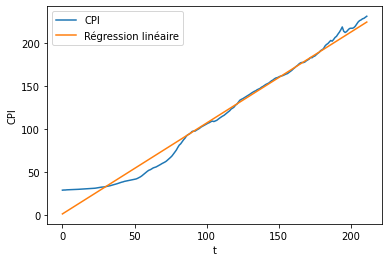

In [35]:
# On calcule le terme de tendance par régression linéaire

reg = LinearRegression().fit(np.array(df.index).reshape(-1, 1),df.CPI)
α = reg.coef_
cst = reg.intercept_

print("Score :",reg.score(np.array(df.index).reshape(-1, 1),df.CPI))
plt.plot(df.index, df.CPI, label="CPI")
plt.plot(df.index, cst + α*df.index, label="Régression linéaire")
plt.legend()
plt.xlabel("t")
plt.ylabel("CPI");

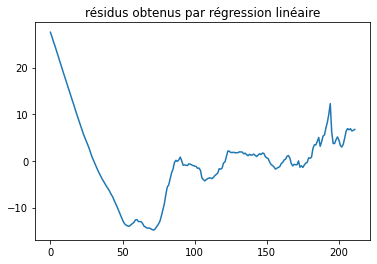

In [36]:
# Avec la méthode sm.OLS -> on obtient le même résultat

df.reset_index(inplace=True)
df.rename(columns={"index": "t"}, inplace=True)
df["const"]=1

X = df[["const", "t"]]
y = df.CPI

model = sm.OLS(y,X)
results = model.fit()
#print(results.summary())
o1=results.resid
plt.plot(o1)
plt.title("résidus obtenus par régression linéaire");

Score : 0.9904534599108377


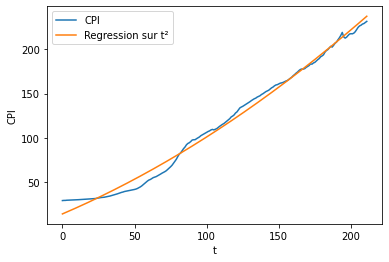

In [37]:
# On calcule le terme de tendance par régression quadratique en t

x = np.concatenate((np.array(df.index).reshape(-1,1), np.array(df.index).reshape(-1,1)**2), 1)
reg = LinearRegression().fit(x,df.CPI)
α1, α2 = reg.coef_
cst2 = reg.intercept_

print("Score :",reg.score(x,df.CPI))
plt.plot(df.index, df.CPI, label="CPI")
plt.plot(df.index, cst2 + α1*df.index + α2*df.index**2, label="Regression sur t²")
plt.xlabel("t")
plt.ylabel("CPI")
plt.legend();

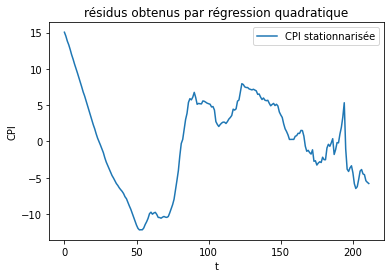

In [38]:
# On crée une variable CPI_stat1 "stationnarisée" 
# en retranchant cette tendance
y1 = cst2 + α1*df.index + α2*df.index**2
df["CPI_stat1"] = df.CPI - y1

plt.plot(df.index, df.CPI_stat1, label="CPI stationnarisée")
plt.xlabel("t")
plt.ylabel("CPI")
plt.legend()
plt.title("résidus obtenus par régression quadratique");

La régression quadratique semble mieux correspondre à la tendance observée du point de vue du score de régression. 

A ce stade, on choisirait donc cette méthode pour stationnariser la série.

### Question 3 - Stationnariser la série de CPI en utilisant un moyenne mobile centrée 5x5.

On procède au calcul de la moyenne mobile 5x5. 

Il s'agit de faire la moyenne de toutes les valeurs obtenues en faisant une moyenne sur 5 indices de temps successifs, pris sur toutes les fenêtres possibles incluant le temps $t$.

Ainsi, il s'agit de faire la moyenne des valeurs suivantes :
* $\frac{1}{5} * ( t_{t-4} + t_{t-3} + t_{t-2} + t_{t-1} + t_{t})$
* $\frac{1}{5} * ( t_{t-3} + t_{t-2} + t_{t-1} + t_{t} +  t_{t+1})$
* $\frac{1}{5} * ( t_{t-2} + t_{t-1} + t_{t} + t_{t+1} + t_{t+2})$
* $\frac{1}{5} * ( t_{t-1} + t_{t} + t_{t+1} + t_{t+2} + t_{t+3})$
* $\frac{1}{5} * ( t_{t} + t_{t+1} + t_{t+2} + t_{t+3} + t_{t+4})$

C'est-à-dire 
$$  \frac{1}{25} * [ (t_{t-4} + t_{t+4}) + 2* (t_{t-3}+t_{t+3})  + 3 * (t_{t-2} + t_{t+2}) + 4*(t_{t-1}+t_{t+1}) + 5*t_{t} ]
$$

En pratique, on calcule donc ces 5 moyennes, de centrage différent sur t, puis on les moyenne.

Il faut noter que la série obtenue sera donc plus courte, puisqu'on perdra quatre éléments au début et à la fin.

In [39]:
# Calcul des 5 moyennes de centrages différents

moy5_1 = df.CPI.rolling(5, center=True).mean().shift(2)
moy5_2 = df.CPI.rolling(5, center=True).mean().shift(1)
moy5_3 = df.CPI.rolling(5, center=True).mean()
moy5_4 = df.CPI.rolling(5, center=True).mean().shift(-1)
moy5_5 = df.CPI.rolling(5, center=True).mean().shift(-2)

df3 = pd.concat([moy5_1, moy5_2, moy5_3, moy5_4, moy5_5], axis=1)

moy_5x5 = df3.mean(axis=1, skipna=False)

df["CPI_stat2"] = df.CPI - moy_5x5

Tracé de CPI et de la moyenne flottante :

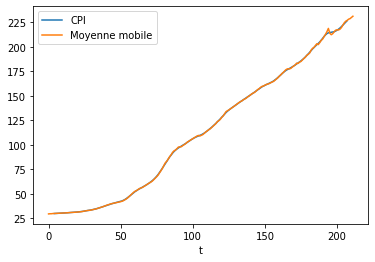

In [40]:
moy_5x5.plot(xlabel="t", label="CPI", legend=True)
df.CPI.plot(label="Moyenne mobile", legend=True);

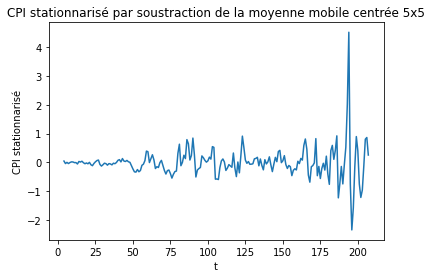

In [41]:
# Tracé du résidu (CPI - moyenne glissante)
df["CPI_stat2"].plot(title="CPI stationnarisé par soustraction de la moyenne mobile centrée 5x5",
                    xlabel="t", ylabel="CPI stationnarisé");

**Commentaire :**  
On observe que l'indice des prix à la consommation (PCI) suit un pic plus brutal que la tendance, légèrement lissé par la moyenne mobile, qui pourrait correspondre à la crise financière de 2008.

La stationnarisation par la moyenne mobile fonctionne mieux que celle par régression, car l'espérance des résidus obtenus est localement plus proche de 0, tandis que dans le cas précédent, elle se moyennait à zéro mais s'éloignait toujours de l'horizontale.

### Question 4 - Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.

Le taux d'inflation correspond à :  

$$ inf(t) = \frac{CPI(t)-CPI(t-1)}{CPI(t-1)}*100 $$

Dans notre cas, les valeurs sont données pour chaque trimestre. On calcule donc le taux d'inflation trimestriel, en comparant la valeur de CPI pour chaque trimestre à celle de la période immédiatement précédente.

Pour calculer le taux d'inflation, nous utilisons les valeurs de CPI, c'est-à-dire la série d'origine, non stationnarisée.

In [42]:
# Calcul du taux d'inflation trimestriel
df["inf"] = 100 * df.CPI.diff() / df.CPI.shift()

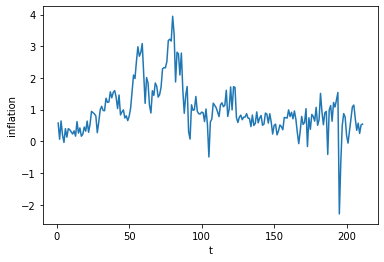

In [43]:
# Tracé
df.inf.plot(xlabel="t", ylabel="inflation");

**Commentaire :**  
On constate que le taux d'inflation évolue par "pics". Ceux-ci correspondent aux crises financières des dernières décennies : crise de 1973 et 1979 (premier et second choc pétrolier, inflationnistes puisque pic dans les valeurs positives), et crise de 2008 (crise des subprimes, déflationniste, puisqu'on constate un pic descendant). 


En dehors de ces périodes de crise, il semblerait que l'inflation soit relativement stationnaire (pas de tendance à la hausse ou à la baisse particulière). 

### Question 5 - Interpréter l'autocorrélogramme et l'autocorrélogramme partiel de inf. Quelle est la différence entre ces deux graphiques ?

On commence par calculer et tracer l'autocorrélogramme, en suivant la définition, c'est-à-dire à partir de l'autocovariance empirique pour un délai $h$ variant dans une fourchette arbitraire autour de $0$ (ici on teste pour $-10 \le h \le 10$).

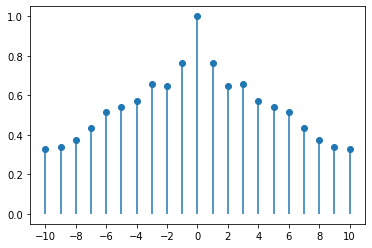

In [44]:
# Autocovariance empirique γ(h)
inf_moy = df.inf.mean()
def γ(h):
     return ((df.inf-inf_moy)*(df.inf.shift(h)-inf_moy)).sum()

# Autocorrélogramme de inf
γ0 = γ(0)
ρ = [γ(h)/γ0 for h in range(-10,11)]

plt.plot(range(-10,11), ρ, "o")
plt.vlines(range(-10,11), 0, ρ)
plt.xticks(range(-10,11,2));

On vérifie que l'allure est la même en utilisant la fonction de statsmodels, qui au vu de la symétrie, ne trace que pour des valeurs positives de $h$ :

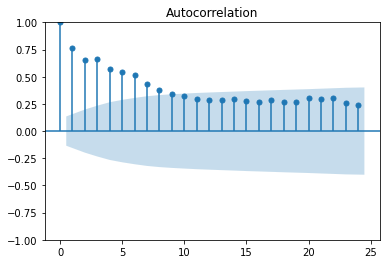

In [45]:
# Avec la fonction de statsmodels
    # même allure
plot_acf(df.inf.dropna())
plt.show()

On procède ensuite au calcul et au tracé de l'autocorrélogramme partiel, dans les mêmes conditions :

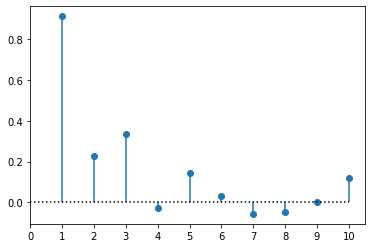

In [46]:
# Autocorrélogramme partiel de inf, pour 10 délais
for h in range(1,11):
    df["inf-"+str(h)] = df.inf.shift(h)
    
idx = df["inf-10"].dropna().index
coeff = []

for h in range(1,11):
    col = ["inf-"+str(i) for i in range (1,h+1)]
    X = df[col].iloc[idx]
    reg = LinearRegression(fit_intercept=False).fit(X, df.inf.iloc[idx])
    coeff.append(reg.coef_[-1])
    
plt.plot(range(1,11), coeff, "o")
plt.vlines(range(1,11),0, coeff)
plt.hlines(0,0,10, "k", linestyles="dotted")
plt.xticks(range(0,11))
plt.xlim(0,10.5);

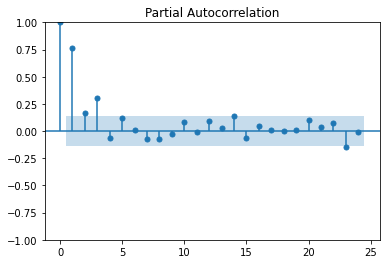

In [47]:
# Avec la fonction de statsmodels
    # On obtient le même résultat
plot_pacf(df.inf.dropna())
plt.show()

**Commentaire :**  
Le premier graphique, symétrique, montre la corrélation des données du temps $t$ avec les temps $t \pm h$. La corrélation est alors toujours positive ou nulle, et se contente de montrer à quel point les variables sont corrélées.

Dans notre cas, cela montre que l'inflation au temps $t$ est de moins en moins corrélée aux valeurs de l'inflation plus anciennes. Cela semble indiquer que l'inflation est un processus ergodique.


Le second graphique quant à lui, est obtenu en faisant une régression linéaire de la valeur au temps $t$ sur les valeurs de $t-1$ à $t-h$, et montre donc l'impact partiel des valeurs précédentes dans ce modèle (en tenant compte, et en corrigeant, les dépendances intermédiaires). Les valeurs peuvent donc être négatives ou positives sans contrainte.


On constate que dans les deux cas l'influence est toujours d'autant plus forte que la valeur est "proche" (la plus grande corrélation, partielle ou non, est atteinte pour $t-1$).

### Question 6 - Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions. Expliquez le terme "spurious regression".

La stationnarité qualifie une série telle que la distribution jointe de $y_{t+1}$,  $y_{t+2}$, ...,  $y_{t+h}$ ne dépend pas de t. Par conséquent, l'espérance de $y_t$ est constante, et le comportement est similaire dans le passé ou dans l'avenir.


L'ergodicité qualifie le fait que l'auto-corrélation d'ordre $k$ tende vers 0 quand $k \rightarrow \infty $. Cela peut s'interpréter comme une série qui ne dépend que du passé "proche". Contrairement au cas précédent, le comportement actuel n'a donc aucune garantie d'être similaire au comportement du passé.

On a besoin de la première condition afin de pouvoir expliquer la variable d'intérêt en fonction des autres variables, sans avoir de dépendance au temps, et donc sans biaiser les résultats. 

La seconde condition, quant à elle, permet de généraliser les résultats obtenus à d'autres fenêtres temporelles, car elle assure l'indépendance à long terme des observations.


Les *spurrious regressions* consistent à mettre en avant des corrélations sans causalité, c'est-à-dire d'expliquer une variable par une autre, de façon visuellement et mathématiquement convaincante, mais sans fondement "réel". C'est par exemple le cas quand l'évolution de deux variables est en réalité la cause d'une troisième variable "cachée", ou encore, dans les cas les plus absurdes, quand deux variables ont simplement la même allure, mais que cette corrélation est due au hasard.


### Question 7 - Faire le test Augmented Dickey Fuller pour inf en utilisant utilisant le critère AIC pour déterminer le nombre de lags à inclure. Commenter.

In [48]:
# Test Augmented Dickey Fuller sur inf

adf_inf_aic=adfuller(df.inf.dropna(), autolag='AIC')
print(adf_inf_aic)

(-2.919055814337223, 0.04317651687154817, 2, 208, {'1%': -3.4621857592784546, '5%': -2.875537986778846, '10%': -2.574231080806213}, 276.75830697408816)


**Commentaire :**  
L'AIC détermine que le nombre de lags à inclure est de 2, et dans ces conditions, on obtient une p-valeur inférieure à 5%. On peut donc rejeter (à 95%) l'hyothèse nulle associée au test d'Augmented Dickey Fuller, c'est-à-dire l'hypothèse selon laquelle la série a été générée selon un processus avec racine unitaire et n'est pas stationnaire. 

On en déduit donc que la série relative au taux d'inflation est stationnaire.

### Exercice 8 - Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.

On cherche la valeur de p telle que les autocorrélations partielles soient nulles ou significativement proches de $0$ pour $h>p$.

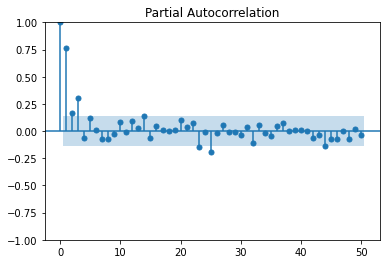

In [49]:
plot_pacf(df.inf.dropna(), lags=50)
plt.show()

D'après le tracé ci-dessus, en considérant qu'on ne garde que les premiers lags pour lesquels l'autocorrélation partielle est au dessus du seuil de significativité, on pourrait s'arrêter à $h = 3$. On utilise d'autres méthodes afin d'affiner ce choix, en calculant l'AIC et le BIC.

In [50]:
params = []
aic = []
bic = []
for h in range(1,30):
    mdl = AR(df.inf.dropna(), lags=[i for i in range(1,h+1)]).fit()
    aic.append(mdl.aic)
    bic.append(mdl.bic)

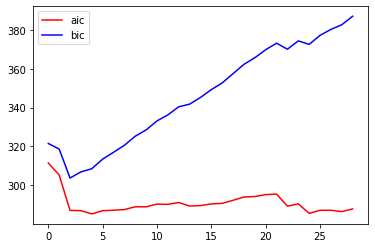

In [51]:
plt.plot(aic, "r", label="aic")
plt.plot(bic, "b", label="bic")
plt.legend();

On cherche les valeurs de h pour lesquelles l'AIC et le BIC sont minimaux :


In [52]:
np.argmin(aic)+1

5

In [53]:
np.argmin(bic)+1

3

**Commentaire :**  
On en déduit que le taux d'inflation peut être modélisé par un processus Auto-Régressif d'ordre 3 (AR(3)), en faisant un consensus entre les valeurs d'AIC et de BIC. En effet, la première admet un minimum pour $h=5$, tandis que la seconde est minimisée pour $h=3$. On choisit donc, d'après les allures tracées ci-dessus, plutôt le délai $h=3$ car l'AIC varie peu entre 3 et 5 tandis que le BIC remonte plus fortement.

### Exercice 9 - Estimer le modèle de la courbe de Phillips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.

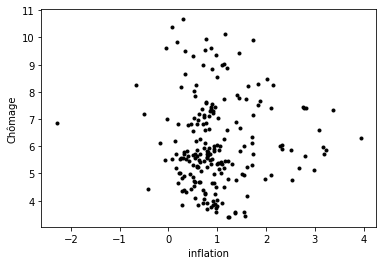

In [54]:
plt.plot(df.inf, df.Unemp, "k.")
plt.xlabel("inflation")
plt.ylabel("Chômage");

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Wed, 11 May 2022   Prob (F-statistic):              0.912
Time:                        15:08:10   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.000       5.714       6.427
inf            0.0159      0.144      0.110      0.912      -0.269       0.301
==============================================================================
Omnibus:                       13.872   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.356
Skew:                           0.660   Prob(JB):                     0.000463
Kurtosis:                       2.937   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

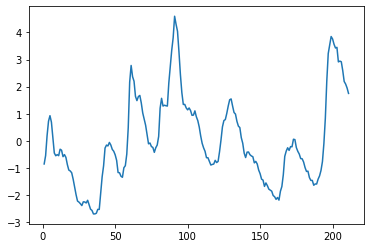

In [55]:
# Régression linéaire de Unemp sur inf et une constante

X = df[["const", "inf"]].loc[df.inf.notna()]
y = df.Unemp.loc[df.inf.notna()]

model = sm.OLS(y,X)
results = model.fit()
display(results.summary())
o1=results.resid
plt.plot(o1);

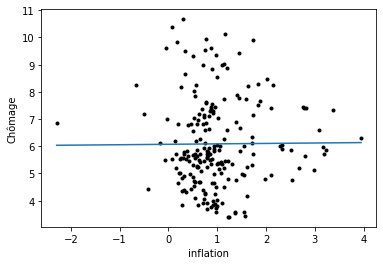

In [56]:
plt.plot(df.inf, df.Unemp, "k.")
x = np.linspace(min(df.inf.dropna()), max(df.inf.dropna()), 100)
plt.plot(x, results.params[0] + results.params[1]*x, label="Régression linéaire")
plt.xlabel("inflation")
plt.ylabel("Chômage");

**Commentaire :**  
Le modèle de Phillips ne s'applique pas de façon concluante sur nos données. En effet la p-valeur obtenue en faisant la régression linéaire du chômage sur l'inflation (avec intercept) est de 0.912, et on ne peut pas rejeter l'hypothèse que le coefficient pour l'inflation soit nul (cette hypothèse est même très loin d'être rejetée).

### Question 10 - Tester l’autocorrélation des erreurs.

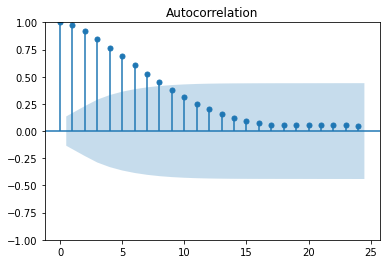

In [57]:
# Tracé de l'autocorrélation des résidus 
plot_acf(o1)
plt.show()

In [58]:
# On veut tester l'hypothèse H0 selon laquelle  
#l'autocorrélation ρ est nulle
DW = 0.044

On récupère la statistique du test de Durbin-Watson dans le summary obtenu Question 9 : on obtient une valeur de DW = 0.475.

D'après le cours, cette valeur doit être approximativement égale à $2(1-\rho)$. On est bien plus proche de 0 que de 2, on en déduit qu'il y a une forte corrélation positive des résidus. 

Cela témoigne de l'existence potentielle d'une saisonnalité dans la variable à expliquer (en l'occurrence le chômage), qui n'a pas pu être captée par la régression linéiare faite ci-dessus, mais qui subsiste donc dans les résidus.

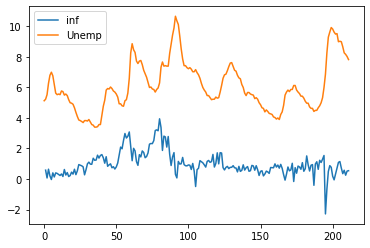

In [59]:
df.inf.plot()
df.Unemp.plot()
plt.legend();

### Question 11 - Corriger l’autocorrélation des erreurs par la méthode vue en cours.

In [60]:
# on extrait ρ à partir de la valeur du dest de Durbin-Watson
ρ = 1 - DW/2
ρ

0.978

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            unemp_tilde   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.195
Date:                Wed, 11 May 2022   Prob (F-statistic):             0.0237
Time:                        15:08:11   Log-Likelihood:                -66.812
No. Observations:                 210   AIC:                             137.6
Df Residuals:                     208   BIC:                             144.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1482      0.023      6.423      0.000       0.103       0.194
inf_tilde     -0.0996      0.044     -2.279      0.024      -0.186      -0.013
==============================================================================
Omnibus:                       82.629   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.245
Skew:                           1.612   Prob(JB):                     6.96e-63
Kurtosis:                       7.724   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

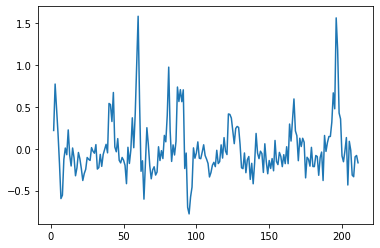

In [61]:
#on définit y tilde et les variables explicatives x tilde :

df["inf_tilde"] = (df.inf - ρ * df.inf.shift())
df["unemp_tilde"] = (df.Unemp - ρ * df.Unemp.shift())

# Régression linéaire de Unemp tilde sur inf tilde et une constante
X = df[["const", "inf_tilde"]].loc[df.inf_tilde.notna()]
y = df.unemp_tilde.loc[df.inf_tilde.notna()]

model = sm.OLS(y,X)
results = model.fit()
display(results.summary())
o1=results.resid
plt.plot(o1);

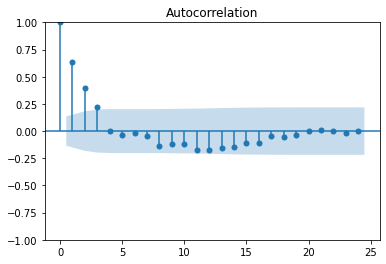

In [62]:
# Tracé de l'autocorrélation des résidus 
plot_acf(o1)
plt.show()

**Commentaire :**  
On obtient, après correction, une diminution de l'autocorrélation des résidus, comme en témoignent l'allure de l'autocorrélogramme ci-dessus, ainsi que la valeur de la statistique du test de Durbin-Watson, qui passe de 0.044 à 0.723.

### Question 12 - Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

On découpe les données en deux jeux de taille identique, afin d'effectuer le test de Chow et d'évaluer s'il existe un point de rupture dans la structure des données.

In [63]:
def chow_test(idx_start, idx_break, idx_stop):
    # Découpage du jeu de données
    p1 = list(range(idx_start,idx_break))
    p2 = list(range(idx_break,idx_stop))

    # On vérifie que la taille est identique
    if len(p1)==len(p2):
        
        X = df[["const", "inf"]].loc[df.inf.notna()].loc[idx_start:idx_stop-1]
        y = df.Unemp.loc[df.inf.notna()].loc[idx_start:idx_stop-1]
        
        # Sur l'ensemble des données
        model = sm.OLS(y,X)
        results = model.fit()
        #print(results.summary())
        u = results.resid
        SSR = u.T@u
        
        # Sur la période 1
        model = sm.OLS(y.loc[p1],X.loc[p1])
        results = model.fit()
        #print(results.summary())
        u = results.resid
        SSR1 = u.T@u

        # Sur la période 2
        model = sm.OLS(y.loc[p2],X.loc[p2])
        results = model.fit()
        #print(results.summary())
        u = results.resid
        SSR2 = u.T@u
        
        # Calcul de la statistique de test
        k = 2 # Nb de variables explicatives
        n = len(X)
        F = ((SSR-(SSR1+SSR2))/(SSR1+SSR2))*(n-2*k)/k
        print("F =", F)
        print("p-valeur :", f.sf(F,k,n-k))

In [64]:
# Coupure à la moitié
chow_test(1, 106, 211)

F = 1.9109836314220963
p-valeur : 0.15052309216846294


In [65]:
# Coupure au 50ème indice de temps
chow_test(1, 51, 101)

F = 79.23341540632757
p-valeur : 3.369369603162395e-21


In [66]:
# Coupure au 150ème indice de temps
chow_test(101, 151, 201)

F = 6.46929049282479
p-valeur : 0.0022963072097109604


**Commentaire :**  
Le test indique le niveau de confiance quant à l'existence d'un point de rupture sur les périodes considérées.

Nous testons différentes périodes :
* En découpant la période en deux parts égales, on obtient une p-valeur de 0.15, qui ne permet pas de rejeter l'hypothèse de l'absence d'un changement de structure, et donc l'hypothèse de stabilité.
* En découpant à d'autres endroits, sur des périodes plus petites pour permettre d'avoir des pétiodes de taille égale à gauche et à droite, on obtient cette fois-ci des p-valeurs très inférieures à 5%, qui permettent de rejeter l'hypothèse de stabilité de la série.

On en déduit donc que la relation chômage - inflation n'est pas stable dans le temps, et qu'il existe au moins un point de rupture strcturel. 

### Question 13 - Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

In [67]:
for h in range(1,5):
    df["Unemp-"+str(h)] = df.Unemp.shift(h)

In [68]:
X = df[['const','inf-1', 'inf-2', 'inf-3', 'inf-4',
        'Unemp-1', 'Unemp-2','Unemp-3', 'Unemp-4']].dropna()
y = df.Unemp.iloc[X.index]

n,k = X.shape

In [69]:
# Modèle non contraint
model = sm.OLS(y,X)
results = model.fit()
u = results.resid
SSR0 = u.T@u

In [70]:
# Modèle contraint
X = df[['const','Unemp-1', 'Unemp-2','Unemp-3', 'Unemp-4']].dropna()
y = df.Unemp.iloc[X.index]

model = sm.OLS(y,X)
results = model.fit()
u = results.resid
SSR1 = u.T@u

In [71]:
n,k = np.shape(X)
contr = 4 #nb de contraintes
F = ((SSR1-SSR0)/contr)/(SSR0/(n-k))

print("SSR0 =", SSR0)
print("SSR1 =", SSR1)
print("F =", F)
print("p-val =", f.sf(F,contr,n-k))

SSR0 = 11.587384278415227
SSR1 = 12.47748104192872
F = 3.898413107128594
p-val = 0.004503988457462041


On obtient une p-valeur inférieure à 5e-3, on en déduit donc qu'on peut rejeter à 5% l'hypothèse de non causalité de l'inflation sur le chômage.

### Question 14. Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.

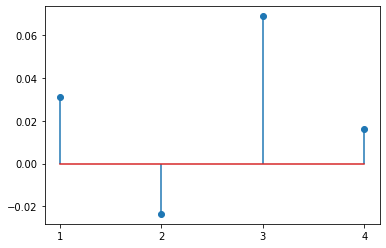

In [72]:
X = df[['const','inf-1', 'inf-2', 'inf-3', 'inf-4',
        'Unemp-1', 'Unemp-2','Unemp-3', 'Unemp-4']].dropna()
y = df.Unemp.iloc[X.index]

# Modèle non contraint
model = sm.OLS(y,X)
results = model.fit()
u = results.resid
plt.stem(range(1,5), results.params[1:5])
plt.xticks(range(1,5));

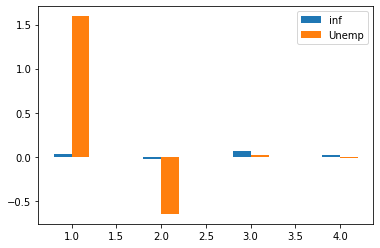

In [73]:
# Comparaison des valeurs des coefficients des délais distribués pour Unemp et inf
plt.bar(np.arange(.9,4.9,1), results.params[1:5], width=.2, label="inf")
plt.bar(np.arange(1.1,5.1,1), results.params[5:], width=.2, label='Unemp')
plt.legend();

On constate que l'effet des délais distribués de la variable Unemp est nettement plus fort que celui de inf. 

NB : C'est également vrai quand on normalise les données (voir cellules ci-dessous). On en déduit que c'est bien l'effet des délais distribués de Unemp qui est plus fort que celui de inf, et que ce n'est pas juste une conséquence des différences d'échelle entre les valeurs de inf et Unemp (un à deux ordres de grandeur d'écart en général, avec une inflation qui varie entre -1 et 1 la plupart du temps, et un taux de chômage plutôt de l'ordre de 10 car il est indiqué en pourcentage).

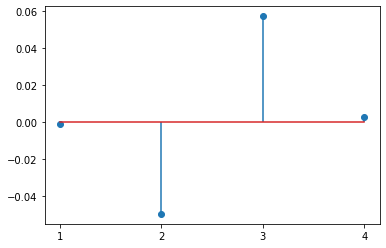

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# On normalise toutes les colonnes
X2 = pd.DataFrame(scaler.fit_transform(X)) 
# On remet la constante à 1 (car une fois normalisée elle vaut 0)
X2[0] = 1 

y2 = pd.DataFrame(scaler.fit_transform(df.Unemp.values.reshape(-1,1))).iloc[X2.index]

# Modèle non contraint
model = sm.OLS(y2,X2)
results2 = model.fit()
u = results2.resid
plt.stem(range(1,5), results2.params[1:5])
plt.xticks(range(1,5));

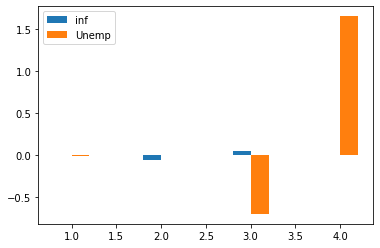

In [75]:
# Comparaison des valeurs des coefficients des délais distribués pour Unemp et inf
plt.bar(np.arange(.9,4.9,1), results2.params[1:5], width=.2, label="inf")
plt.bar(np.arange(1.1,5.1,1), results2.params[5:], width=.2, label='Unemp')
plt.legend();

On calcule l'impact à long terme de l'inflation, en sommant les coefficients obtenus précédemment (sans normalisation).

In [76]:
# Somme des coefficients des délais distribus pour inf sur ce modèle
print(f"Impact à long terme de l'inflation : {results.params[1:5].sum():.3f}")

Impact à long terme de l'inflation : 0.093
